___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise***
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [ ]:
df = pd.read_csv("marketing_campaign.csv", delimiter=";", parse_dates=["Dt_Customer"])

display(df.head(), df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


(2240, 29)

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [ ]:
df.drop("Response", axis="columns", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [ ]:
print(f"There is/are {df.duplicated().sum()} number of duplicated rows")

There is/are 0 number of duplicated rows


In [ ]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue'],
      dtype='object')

In [ ]:
df.id.is_unique

True

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2240,"5,592.16",0,"2,828.25","5,458.50","8,427.75",11191,"3,246.66"
year_birth,2240,"1,968.81",1893,1959,1970,1977,1996,11.98
income,2216,"52,247.25",1730,35303,"51,381.50",68522,666666,"25,173.08"
kidhome,2240,0.44,0,0,0,1,2,0.54
teenhome,2240,0.51,0,0,0,1,2,0.54
dt_customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
recency,2240,49.11,0,24,49,74,99,28.96
mntwines,2240,303.94,0,23.75,173.50,504.25,1493,336.60
mntfruits,2240,26.30,0,1,8,33,199,39.77
mntmeatproducts,2240,166.95,0,16,67,232,1725,225.72


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
education,2240,5,Graduation,1127
marital_status,2240,8,Married,864


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

In [ ]:
df["income"].fillna(df.groupby(["education", "marital_status"])["income"].transform("median"), inplace=True)
# Fill the missing values in the "income" column with the median of the group of the same education and marital status.

In [ ]:
df.dt_customer.max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
df["tenure"] = (df.dt_customer.max() - df.dt_customer).dt.days
df.tenure

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: tenure, Length: 2240, dtype: int64

In [ ]:
df.tenure.describe()

count     2240
mean    353.58
std     202.12
min          0
25%     180.75
50%     355.50
75%        529
max        699
Name: tenure, dtype: float64

In [ ]:
df["age"] = 2014 - df.year_birth

In [ ]:
df.age.describe()

count    2240
mean    45.19
std     11.98
min        18
25%        37
50%        44
75%        55
max       121
Name: age, dtype: float64

In [ ]:
df.marital_status.value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
marital_status_map = {
    "Single": "single",
    "Married": "married",
    "Together": "together",
    "Divorced": "divorced",
    "Widow": "widowed",
    "alone": "single",
    "Absurd": "single",
    "YOLO": "single",
}  # map for marital status
df["marital_status"] = df.marital_status.transform(lambda x: x.map(marital_status_map))
# this code creates a mapping from different values of a column to standardized values,
# and then applies this mapping to the column using the transform method.
# This can be useful when working with data that contains a wide range of values,
# and you need to standardize them to a set of standard values for analysis.

In [ ]:
# Since z_costcontact and z_revenue are constant series will have no effect on clustering.
df.drop(
    ["dt_customer", "year_birth", "z_costcontact", "z_revenue"],
    axis="columns",
    inplace=True,
)

In [ ]:
@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    """The code is a function that creates interactive visualizations of different columns in a Pandas dataframe.
      The function uses the interact function from the ipywidgets library to create a user
      interface that allows the user to select a column, choose a visualization type (countplot or histogram),
      and view the resulting plot.

    Args:
        col (str): name of the columns
        chart (str): name of the plot
    """
    colors = np.random.choice(["blue", "red", "green"])

    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + " Countplot")
        plt.xlabel(col)
        ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")
        ax.bar_label(ax.containers[0])

    else:
        try:
            mean = np.mean(df[col])
            std = np.std(df[col])
            plt.figure(figsize=(20, 5))
            plt.title(col + " Histplot")
            plt.xlabel(col)
            ax = sns.histplot(data=df, x=col, bins=100, kde=True, color=colors)
            plt.axvline(mean + std, color="black", linestyle="--")
            plt.axvline(mean - std, color="black", linestyle="--")
            plt.text(
                x=(mean - std),
                y=plt.ylim()[1],
                s=str(round(mean - std)),
                fontsize=16,
                color="black",
            )
            plt.text(
                x=(mean + std),
                y=plt.ylim()[1],
                s=str(round(mean + std)),
                fontsize=16,
                color="black",
            )
            ax.bar_label(ax.containers[0])
        except:
            try:
                mean = np.mean(df[col])
                std = np.std(df[col])
                plt.figure(figsize=(20, 5))
                plt.title(col + " Histplot")
                plt.xlabel(col)
                ax = sns.histplot(data=df, x=col, bins=100, kde=True, color=colors)
                plt.axvline(mean + std, color="black", linestyle="--")
                plt.axvline(mean - std, color="black", linestyle="--")
                plt.text(
                    x=(mean - std),
                    y=plt.ylim()[1],
                    s=str((mean - std).date()),
                    fontsize=16,
                    color="black",
                )
                plt.text(
                    x=(mean + std),
                    y=plt.ylim()[1],
                    s=str((mean + std).date()),
                    fontsize=16,
                    color="black",
                )
                ax.bar_label(ax.containers[0])
            except:
                print("Not Available, Pls use count plot for that feature")

interactive(children=(Dropdown(description='col', options=('education', 'marital_status', 'income', 'kidhome',…

**Some insights from graphs and statistics:**
1. The birth years of our customers follow a normal distribution, with 68% of customers born between 1957 and 1981. There are a few outliers.

2. The majority of our customers have a bachelor’s degree or higher.

3. The number of customers who are married or living together is higher than those who are single.

4. The income distribution of our customers is close to normal, with 68% earning between $27k and $77.5k. There is a long tail on the right, indicating some outliers.

5. The ratio of customers with and without kids at home is approximately 47% to 53% respectively.

6. The ratio of customers with and without teens at home is approximately 48% to 52% respectively.

7. The recency of customers’ purchases is uniformly distributed across the data, with no outliers. 16% of our customers have a recency of more than 78 days.

8. Customers who purchased wines, fruits, meat products, fish products, sweets, and gold products spent up to $640. However, the distribution is right-skewed, indicating that most purchases were for minor amounts.

10. 970 customers received only one discount. 50% of customers received discounts between 1-3 times.

11. 49 customers have never made a purchase from our website. 50% of customers have made 2-6 purchases from the web.

12. 586 customers have never made a purchase via catalogue. 50% of customers have made 0-2 purchases via catalogue.

13. 20 customers have made 0 or 1 purchases from the store. In contrast, 75% of customers have made 2-9 purchases from the store.

14. 68% of customers visited the website 3-8 times last month. There are some outliers who visited more than 10 times.

15. The count of customers accepting the campaign is around 150, which is 6-7% of total customers, except for campaign 2, where it drops drastically to 1.3%.

16. Complaints are low compared to the total number of customers, with the ratio of customers who complained to those who did not being around 0.01.

17. 25% of our customers were acquired in the last 6 months. The distribution of customers’ first purchases is close to uniform,
with the highest number of customers making their first purchase in the first quarter of 2013.

In [ ]:
not_binary = [
    col for col in df.columns if df[col].nunique() > 2 and not df[col].is_unique
]
not_binary

['education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'tenure',
 'age']

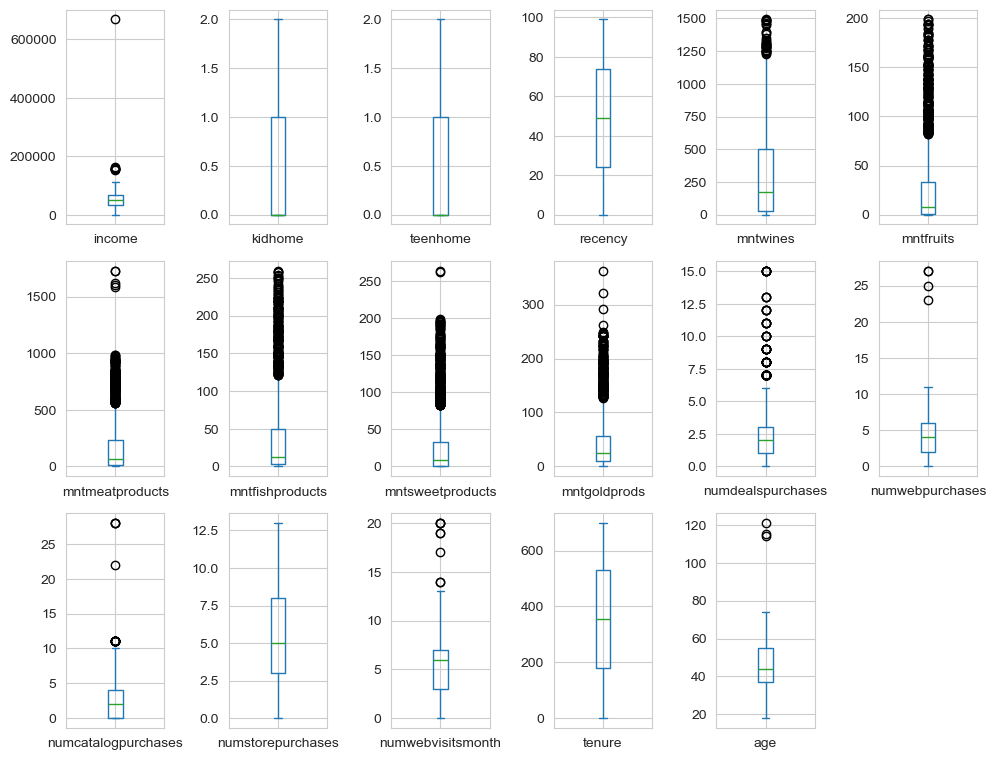

In [ ]:
df[not_binary].plot(kind="box", subplots=True, layout=(4, 6), figsize=(10, 10))
plt.tight_layout()

**Insights from box plots:**

1. Amount of products have outliers. Meat products amount has extreme values in it.

2. Website, catalog purchases have distinct outliers.

3. Age and Income have outliers those can be typo and should be investigated.   

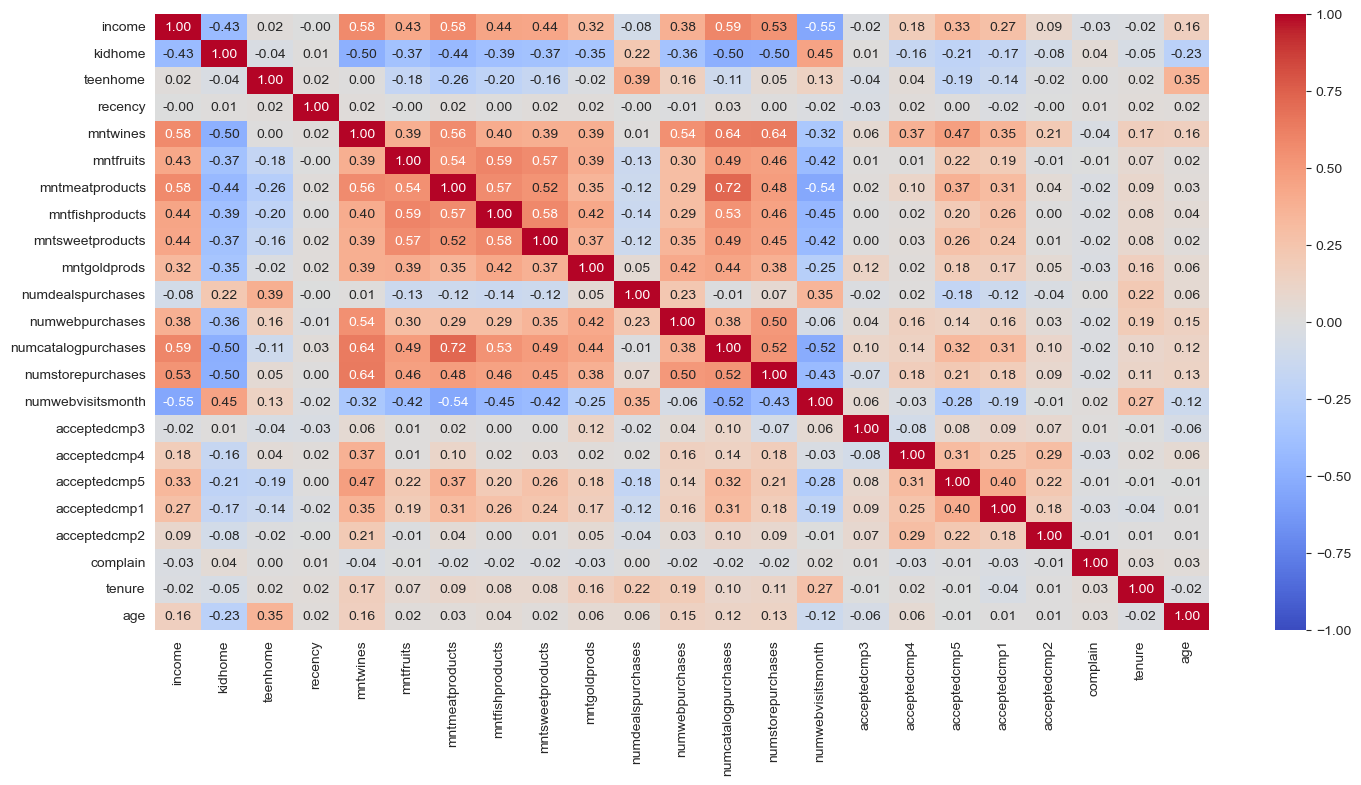

In [ ]:
plt.figure(figsize=(17, 8))
sns.heatmap(
    df.iloc[:, 1:].corr(numeric_only=True),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    fmt=".2f",
)
plt.show()

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted.

In [ ]:
# PCA only can be used with continious variables.
df_pca = df[not_binary].iloc[:, 2:].copy()
df_pca

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,tenure,age
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,57
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,60
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,49
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,30
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,381,47
2236,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,19,68
2237,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,155,33
2238,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,156,58


In [ ]:
scaler = StandardScaler().set_output(transform="pandas")
pca = PCA(n_components=3).set_output(transform="pandas")

In [ ]:
df_pca = scaler.fit_transform(df_pca)
df_pca

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,tenure,age
0,0.24,-0.83,-0.93,0.31,0.98,1.55,1.68,2.46,1.48,0.84,0.35,1.41,2.51,-0.55,0.69,1.53,0.99
1,-0.24,1.03,0.91,-0.38,-0.87,-0.64,-0.71,-0.65,-0.63,-0.73,-0.17,-1.11,-0.57,-1.17,-0.13,-1.19,1.24
2,0.77,-0.83,-0.93,-0.80,0.36,0.57,-0.18,1.35,-0.15,-0.04,-0.69,1.41,-0.23,1.30,-0.54,-0.21,0.32
3,-1.02,1.03,-0.93,-0.80,-0.87,-0.56,-0.65,-0.50,-0.58,-0.75,-0.17,-0.75,-0.91,-0.55,0.28,-1.06,-1.27
4,0.24,1.03,-0.93,1.55,-0.39,0.42,-0.22,0.16,-0.00,-0.56,1.38,0.33,0.12,0.06,-0.13,-0.95,-1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.36,-0.83,0.91,-0.11,1.20,0.42,0.07,0.08,2.20,3.89,-0.17,1.77,0.12,-0.55,-0.13,0.14,0.15
2236,0.47,2.89,0.91,0.24,0.30,-0.66,-0.61,-0.69,-0.66,-0.69,2.42,1.41,-0.23,-0.24,0.69,-1.66,1.90
2237,0.19,-0.83,-0.93,1.45,1.80,0.55,0.22,-0.10,-0.36,-0.38,-0.69,-0.75,0.12,2.22,0.28,-0.98,-1.02
2238,0.68,-0.83,0.91,-1.42,0.37,0.09,0.21,0.78,0.07,0.33,-0.17,0.69,0.80,1.30,-0.95,-0.98,1.07


In [ ]:
pca_comps = pca.fit_transform(df_pca)
pca_comps

,pca0,pca1,pca2
0,3.89,0.57,-1.92
1,-2.34,-0.30,1.91
2,1.88,-0.31,0.20
3,-2.51,-1.51,-0.49
4,-0.32,-0.38,-0.79
...,...,...,...
2235,2.69,1.44,-0.60
2236,-1.61,2.57,1.25
2237,1.28,-0.92,0.06
2238,2.01,0.53,1.80


In [ ]:
pca.explained_variance_ratio_.cumsum()
# The cumulative sum of the explained variance ratio provides a way to visualize
# how much variance is explained by each principal component, and how much variance is left unexplained.

array([0.35693499, 0.47617302, 0.56004027])

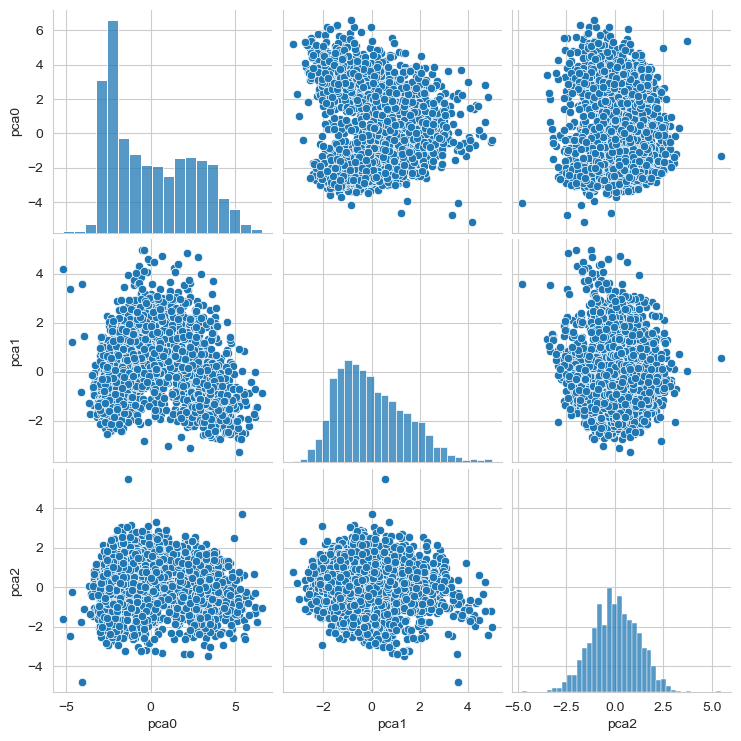

In [ ]:
sns.pairplot(pca_comps)

In [ ]:
color = np.argmax(pca_comps, axis=1)
color
# For a basic manuel clustering we take tha max value for a row and its component as label.

array([0, 2, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
pca_comps["label"] = color

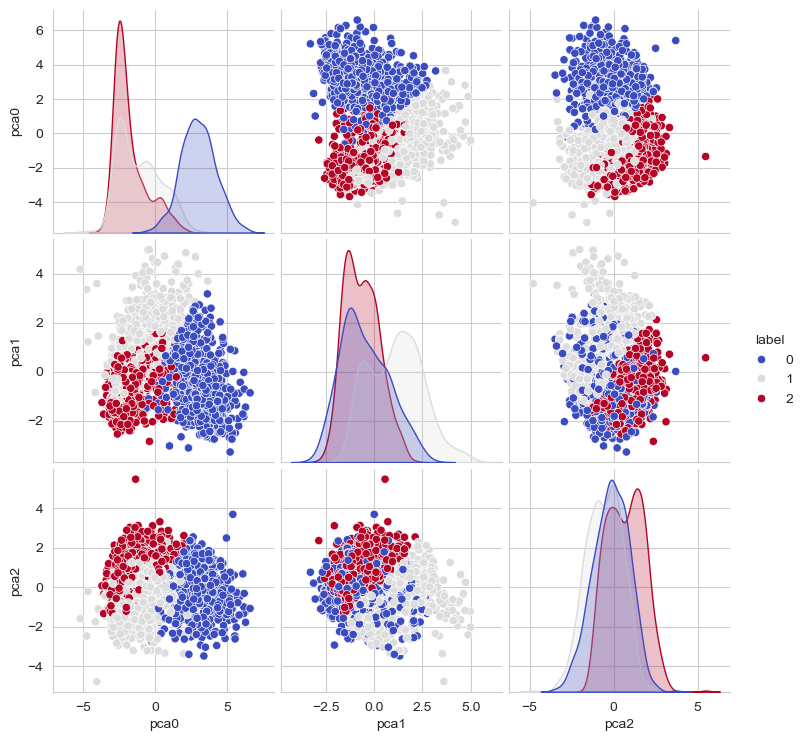

In [ ]:
sns.pairplot(pca_comps, hue="label", palette="coolwarm")

In [ ]:
# Create the 3D scatter plot
fig = px.scatter_3d(pca_comps, x="pca0", y="pca1", z="pca2", color=color)

# Customize the plot
fig.update_layout(scene=dict(xaxis_title="1", yaxis_title="2", zaxis_title="3"))
fig.show()

- In the context of visual data analysis, 3 is an appropriate number for segmentation.

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clustering

### Create a new dataset with numeric features

In [ ]:
# Let's drop the features that not continious or ordinal, because model kmeans is not designed for mix type.
df1 = df[not_binary].iloc[:, 2:].copy()

In [ ]:
scaler1 = RobustScaler().set_output(transform="pandas")

In [ ]:
# cluster_df = scaler.fit_transform(df1)
cluster_df = scaler1.fit_transform(df1)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):
    """
    Compute the Hopkins statistic for the given dataframe X.
    Hopkins statistic is a measure of the randomness of a data set.
    It is calculated as the ratio of the sum of the distances to the nearest neighbors
    of the uniform random sample to the sum of the distances to the nearest neighbors of
    the original data sample.
    The value of the Hopkins statistic is between 0 and 1, with a value of 0 indicating
    that the data is not random and a value of 1 indicating that the data is completely random.
    The Hopkins statistic is a good measure of the randomness of a data set,
    as it can be used to determine if a data set is random or not.

    Parameters:
    X (pandas.DataFrame): Input dataframe
    ratio (float, optional): Ratio of the uniform random sample to the original data sample. Defaults to 0.05.

    Returns:
    float: Hopkins statistic
    """

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    sample_size = int(
        X.shape[0] * ratio
    )  # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1])
    )

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [ ]:
result = []
for _ in range(10):
    result.append(hopkins(cluster_df, 0.05))

np.mean(result)

# With hopkins test, whether the data is uniform or randomly distributed, it returns us a result about it.
# We say that the closer it is to 1, the more prone to data clustering.

0.8983943489130011

#### Determine optimal number of clusters

### inertia

In [ ]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

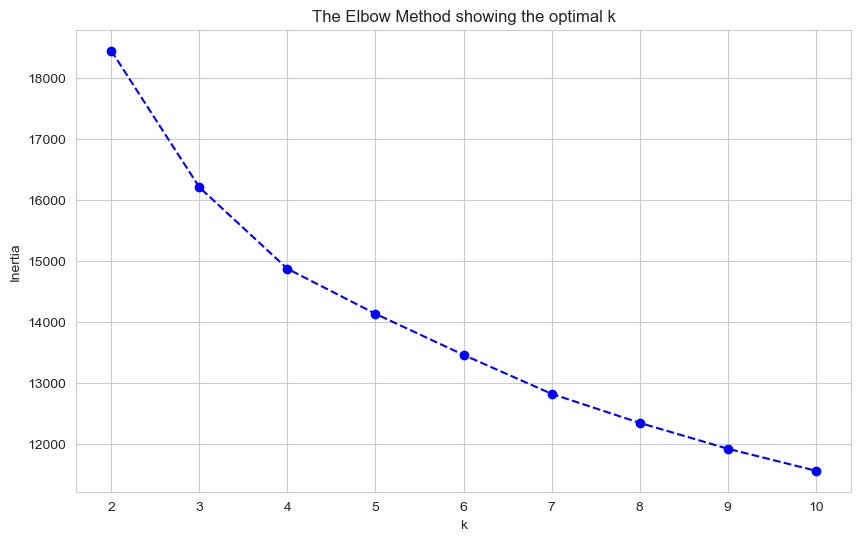

In [ ]:
elbow_vis(cluster_df)
# New paper about elbow method. May be you want to read and try. http://arxiv.org/abs/2212.12189

### distortion

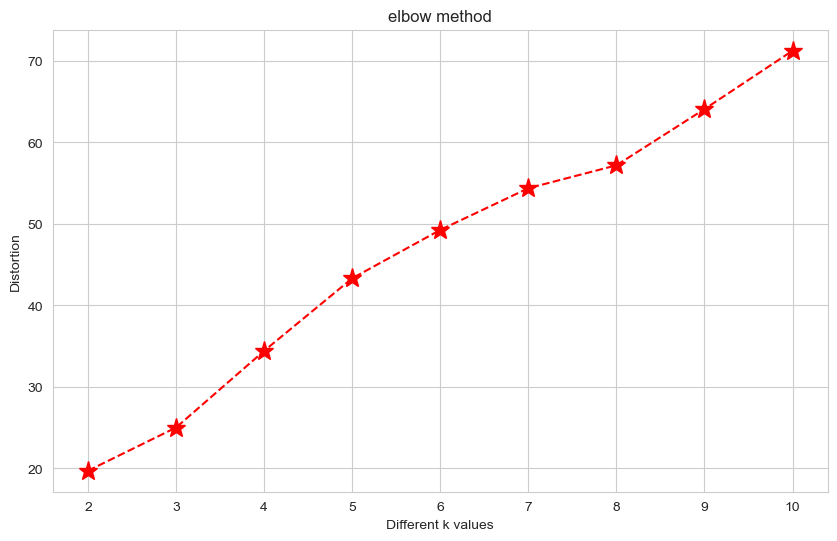

In [ ]:
elbow_vis(cluster_df, inertia=False)

### silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(cluster_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3710825622582602
For n_clusters=3, the silhouette score is 0.2368258550194283
For n_clusters=4, the silhouette score is 0.22773752394145758
For n_clusters=5, the silhouette score is 0.2296135632491363
For n_clusters=6, the silhouette score is 0.23058635111721845
For n_clusters=7, the silhouette score is 0.2154555796366764
For n_clusters=8, the silhouette score is 0.13282987008902464
For n_clusters=9, the silhouette score is 0.13289892818113117
For n_clusters=10, the silhouette score is 0.13563588073674013


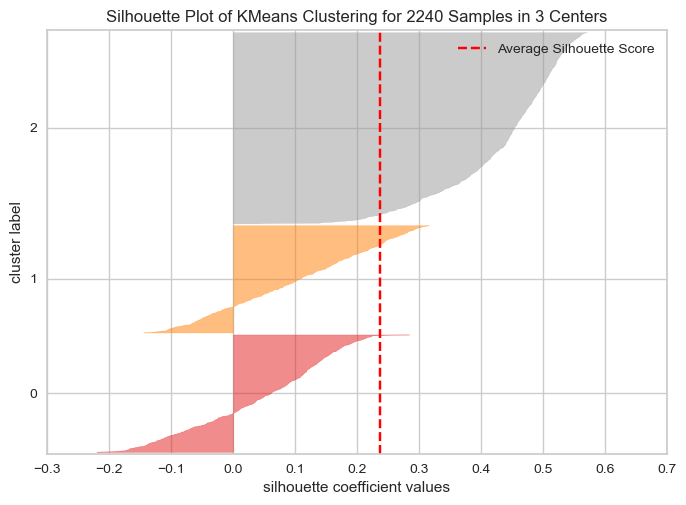

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(cluster_df)  # Fit the data to the visualizer
visualizer.poof()

In [ ]:
model3.n_clusters
# We can get the number of clusters with .n_clusters.

3

In [ ]:
for i in range(model3.n_clusters):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.043748129332324005
mean silhouette score for label 1    : 0.10244231269125129
mean silhouette score for label 2    : 0.43108424940778917
mean silhouette score for all labels : 0.2368258550194283


#### Apply K Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

# n_clusters = 3. Since we decided to have 3 clusters according to scores and graphs.

In [ ]:
kmeans.fit_predict(cluster_df)

array([1, 2, 0, ..., 0, 0, 2])

#### Visualizing and Labeling All the Clusters

In [ ]:
fig = px.scatter_3d(pca_comps, x="pca0", y="pca1", z="pca2", color=kmeans.labels_)

# Customize the plot
fig.update_layout(scene=dict(xaxis_title="1", yaxis_title="2", zaxis_title="3"))
fig.show()

In [ ]:
df1["kmeans_labels"] = kmeans.labels_

In [ ]:
@interact(col1=df1, col2=df1.columns)
def plot(col1, col2):
    sns.jointplot(
        data=df1, x=col1, y=col2, hue="kmeans_labels", palette="coolwarm", height=7
    )

interactive(children=(Dropdown(description='col1', options=('income', 'kidhome', 'teenhome', 'recency', 'mntwi…

In [ ]:
@interact(col1=df1.columns, col2=df1.columns, col3=df1.columns)
def plot(col1, col2, col3):
    fig = px.scatter_3d(df1, x=col1, y=col2, z=col3, color=kmeans.labels_)

    # Customize the plot
    fig.update_layout(scene=dict(xaxis_title=col1, yaxis_title=col2, zaxis_title=col3))
    fig.show(renderer="vscode")

interactive(children=(Dropdown(description='col1', options=('income', 'kidhome', 'teenhome', 'recency', 'mntwi…

### Clustering based on selected features

#### Select features from existing data

In [ ]:
df1

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,tenure,age,kmeans_labels
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,57,1
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,60,2
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,49,0
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,30,2
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,381,47,1
2236,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,19,68,0
2237,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,155,33,0
2238,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,156,58,0


In [ ]:
clus_pred = df1.groupby("kmeans_labels").mean().T
clus_pred

kmeans_labels,0,1,2
income,"59,498.01","74,604.49","35,195.07"
kidhome,0.27,0.05,0.77
teenhome,0.82,0.25,0.46
recency,47.75,50.40,49.22
mntwines,479.87,575.97,42.90
mntfruits,18.61,73.53,4.51
mntmeatproducts,146.94,446.85,22.03
mntfishproducts,26.97,104.69,6.29
mntsweetproducts,17.81,76.93,4.74
mntgoldprods,58.09,82.39,13.82


In [ ]:
clus_pred_scaled = MinMaxScaler().set_output(transform="pandas").fit_transform(clus_pred.T).T
# We employ the MinMaxScaler to adjust the values within a range of 0 to 1.
# This method helps mitigate the influence of larger scales.
# As a result, it allows for a clearer distinction between each feature.

In [ ]:
fig = px.line(data_frame=clus_pred_scaled)
fig.show(renderer="vscode")
# We plot this lineplot to see where the best separation is
# and in which features my data is intricate.

In [ ]:
df1.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'tenure', 'age', 'kmeans_labels'],
      dtype='object')

In [ ]:
selected_features = [
    "income",
    "mntwines",
    "mntmeatproducts",
    "numcatalogpurchases",
    "tenure",
    "age",
]
# Create a new DataFrame with the selected features
df_selected = df1[selected_features]

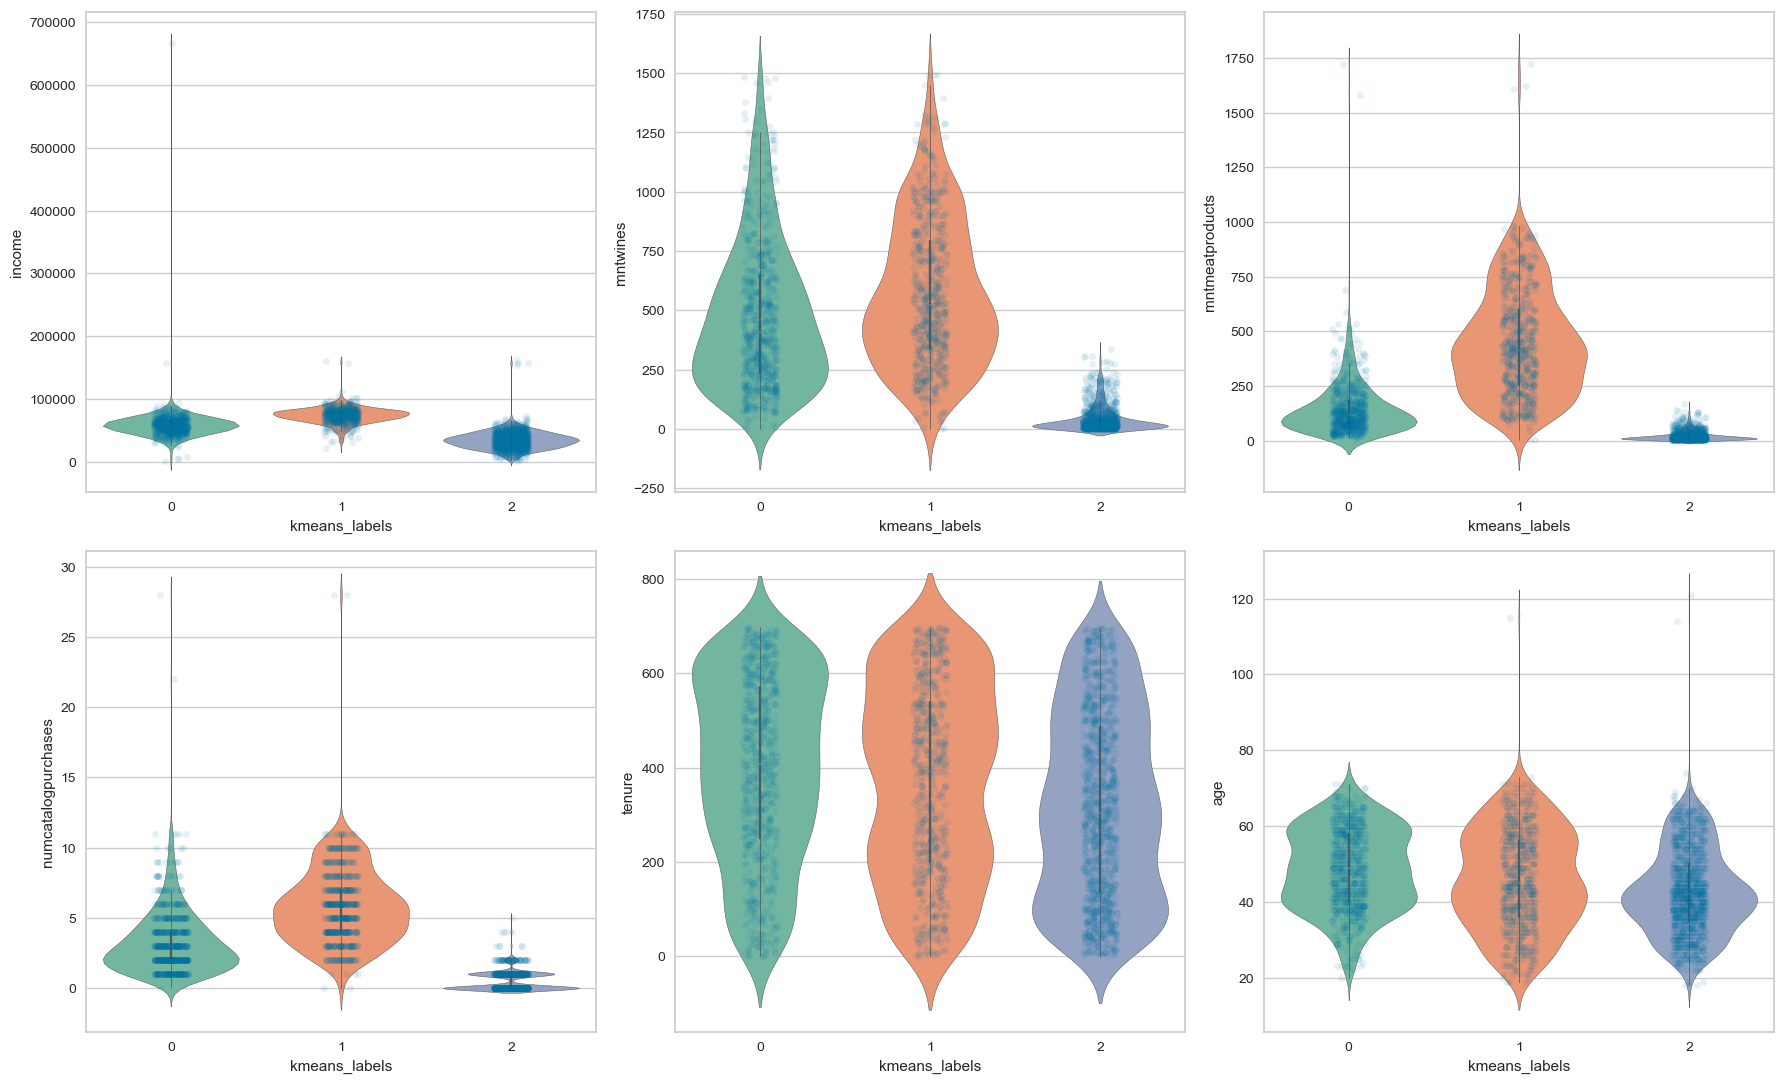

In [ ]:
# let's observe this with boxplot:
plt.figure(figsize=(18, 11))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.stripplot(
        y=feature,
        x=df1["kmeans_labels"],
        data=df_selected,
        jitter=True,
        edgecolor="gray",
        alpha=0.1,
    )
    sns.violinplot(y=feature, x=df1["kmeans_labels"], data=df_selected, palette="Set2")

plt.tight_layout()

In [ ]:
df_selected.income.nlargest(2)

2233   666666
617    162397
Name: income, dtype: float64

In [ ]:
# df_selected.drop(2233, axis=0, inplace=True)

In [ ]:
df_selected.income.describe()

count        2240
mean    52,231.86
std     25,039.87
min          1730
25%     35,538.75
50%     51,222.50
75%     68,289.75
max        666666
Name: income, dtype: float64

In [ ]:
def income_binner(x):
    if x < 35303:
        return 0
    elif x < 68522:
        return 1
    else:
        return 2

df_selected["income"] = df_selected["income"].apply(income_binner)

#### Determine optimal number of clusters

In [ ]:
# df_selected = scaler.fit_transform(df_selected)
df_selected = scaler1.fit_transform(df_selected)

In [ ]:
result = []
for _ in range(10):
    result.append(hopkins(df_selected, 0.05))

np.mean(result)

0.9203233999701961

In [ ]:
# With 17 features, my Hopkins test result was 0.89, with 6 features 92 more prone to clustering.

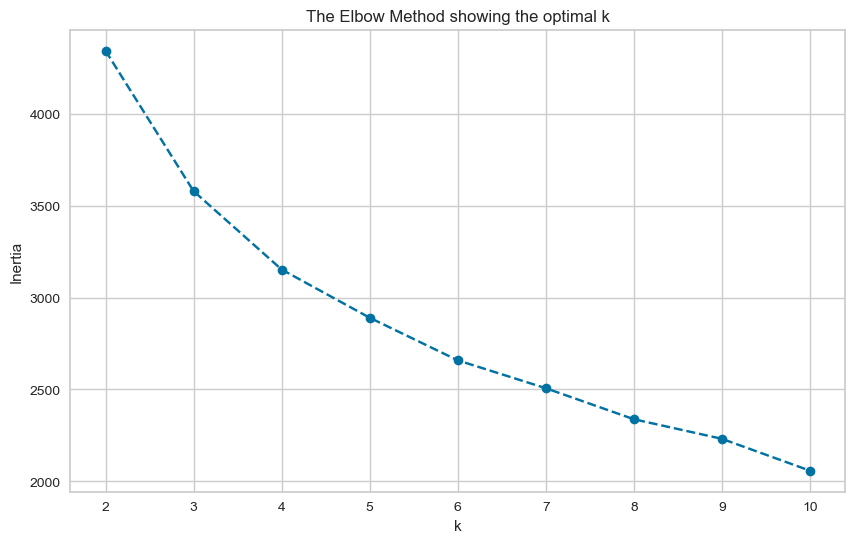

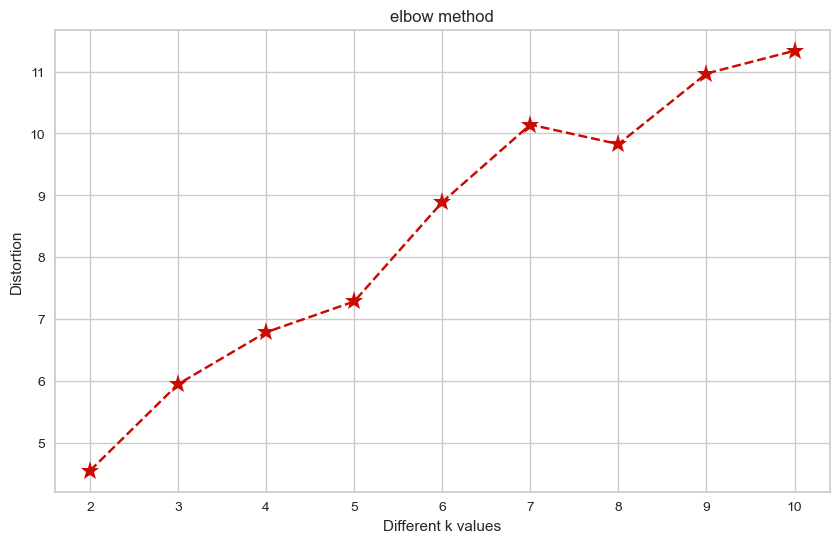

In [ ]:
elbow_vis(df_selected)
elbow_vis(df_selected, inertia=False)

In [ ]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_selected)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4159172103868794
For n_clusters=3, the silhouette score is 0.30860637493296483
For n_clusters=4, the silhouette score is 0.23051443108991115
For n_clusters=5, the silhouette score is 0.2201652679821219
For n_clusters=6, the silhouette score is 0.2167515629376957
For n_clusters=7, the silhouette score is 0.22036995747921156
For n_clusters=8, the silhouette score is 0.21745791634369427


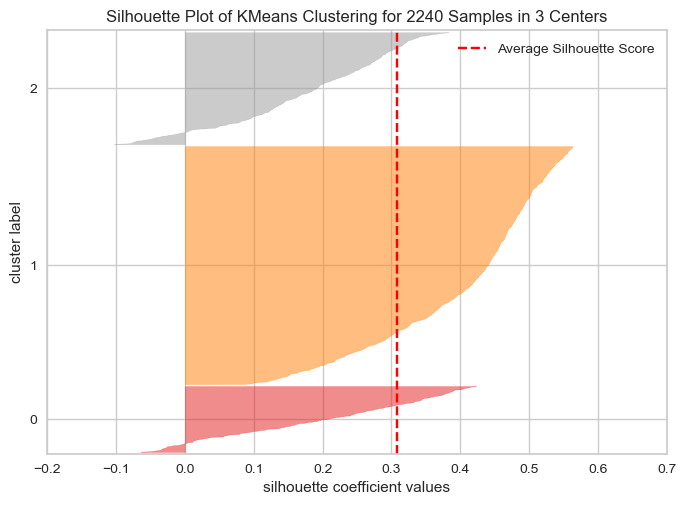

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df_selected)  # Fit the data to the visualizer
visualizer.poof()

In [ ]:
for i in range(model3.n_clusters):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.1920562388513203
mean silhouette score for label 1    : 0.40305284466055497
mean silhouette score for label 2    : 0.1764254862401178
mean silhouette score for all labels : 0.30860637493296483


#### Building the model based on the optimal number of clusters with selected features

In [ ]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit_predict(df_selected)

array([0, 1, 2, ..., 2, 2, 1])

In [ ]:
@interact(col1=df1.columns, col2=df1.columns, col3=df1.columns)
def plot(col1, col2, col3):
    fig = px.scatter_3d(df1, x=col1, y=col2, z=col3, color=final_model.labels_)

    # Customize the plot
    fig.update_layout(scene=dict(xaxis_title=col1, yaxis_title=col2, zaxis_title=col3))
    fig.show(renderer="vscode")

interactive(children=(Dropdown(description='col1', options=('income', 'kidhome', 'teenhome', 'recency', 'mntwi…

In [ ]:
@interact(col1=df1.columns, col2=df1.columns)
def plot(col1, col2):
    sns.jointplot(
        data=df1, x=col1, y=col2, hue=final_model.labels_, palette="coolwarm", height=10
    )
    plt.show()

interactive(children=(Dropdown(description='col1', options=('income', 'kidhome', 'teenhome', 'recency', 'mntwi…

In [ ]:
@interact(col=df.columns, hue=df.select_dtypes(include="O").columns)
def plot(col, hue):
    sns.boxplot(y=col, x=final_model.labels_, hue=hue, data=df, palette="deep")
    plt.legend(bbox_to_anchor=(1, 1))

interactive(children=(Dropdown(description='col', options=('id', 'education', 'marital_status', 'income', 'kid…

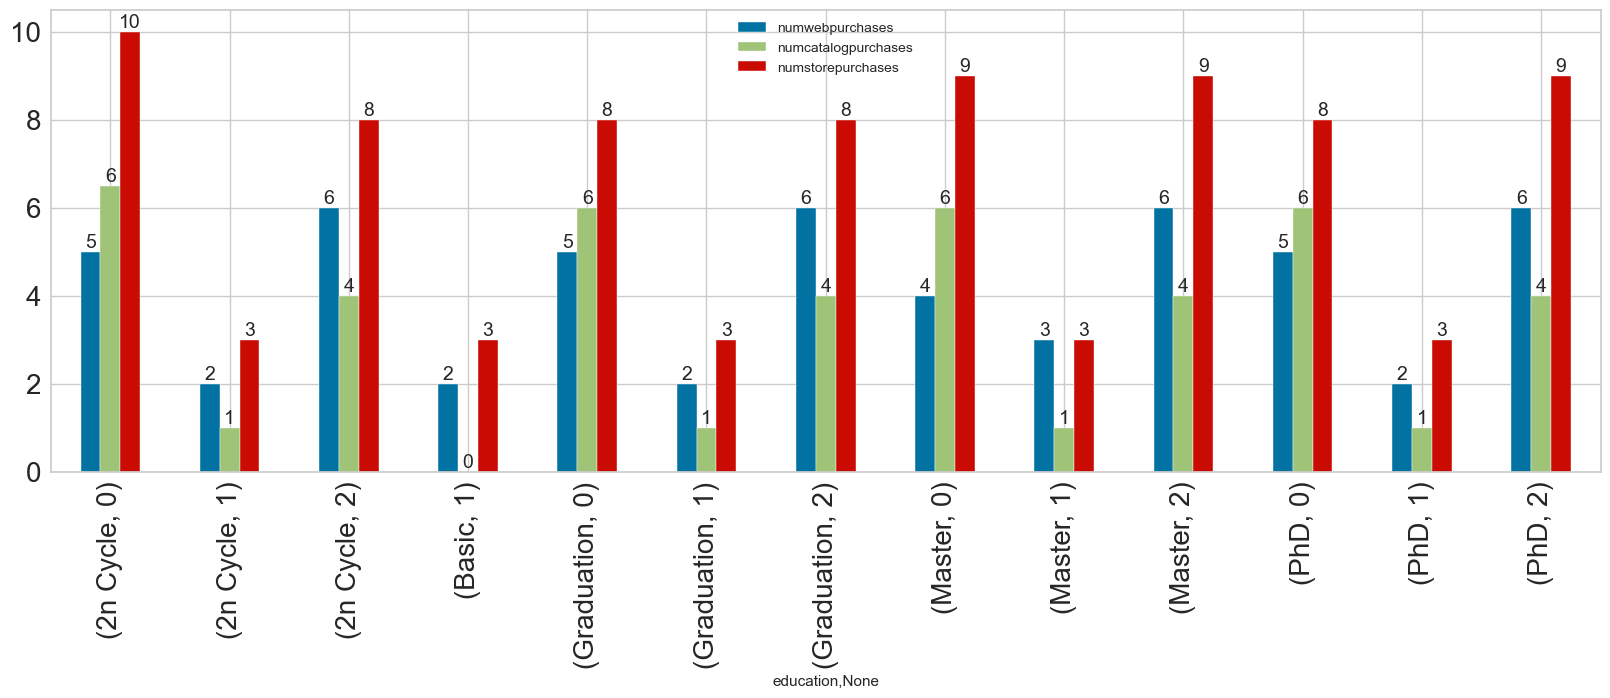

In [ ]:
ax = (
    df[["education"]]
    .join(df1.iloc[:, 11:14])
    .groupby(["education", final_model.labels_])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

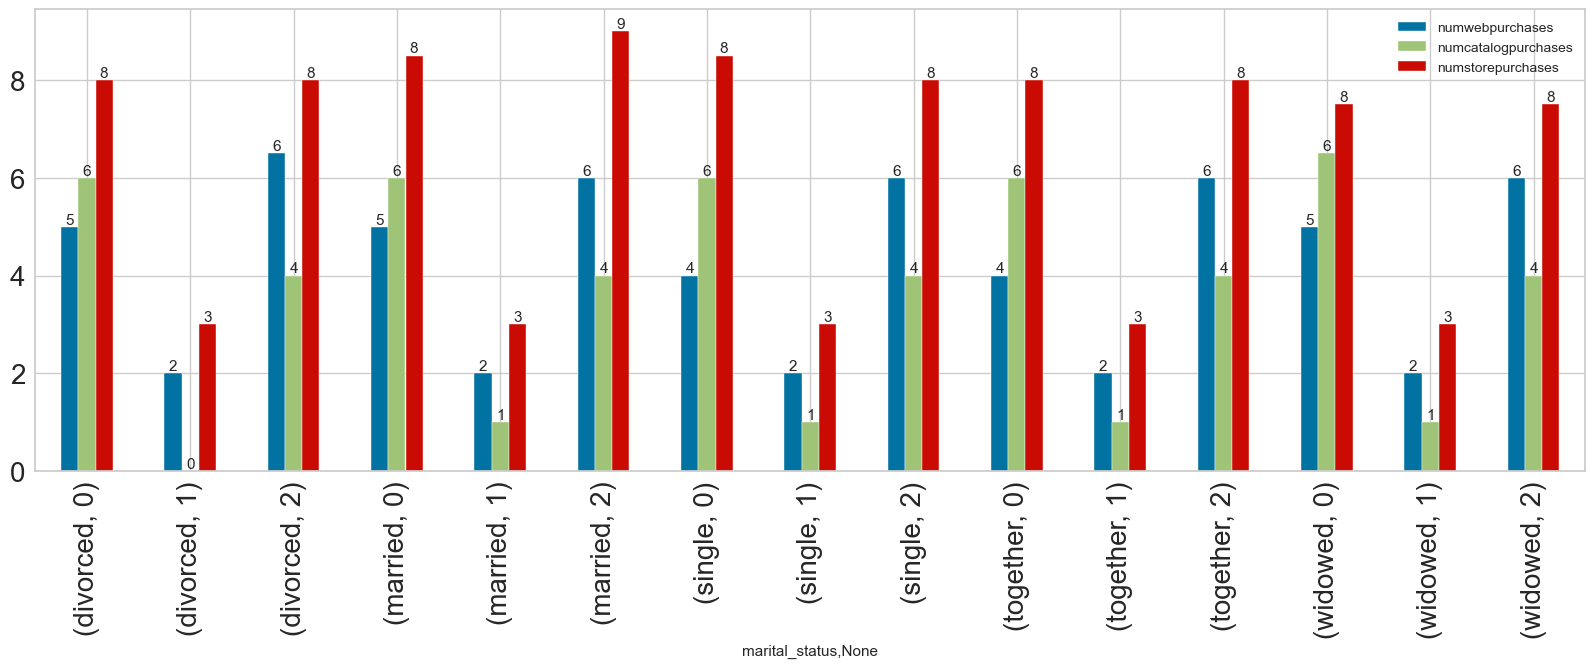

In [ ]:
ax = (
    df[["marital_status"]]
    .join(df1.iloc[:, 11:14])
    .groupby(["marital_status", final_model.labels_])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=11)

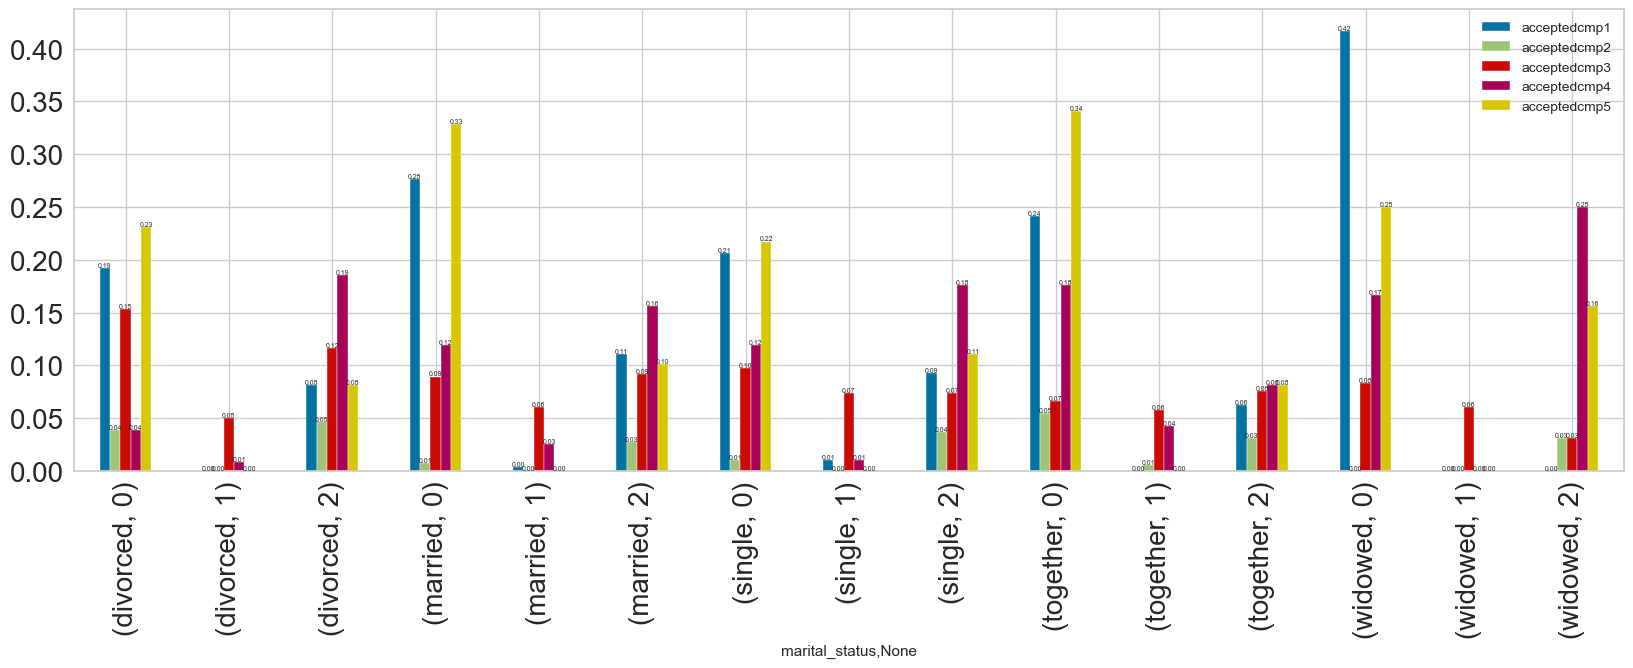

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "acceptedcmp4",
            "acceptedcmp5",
        ]
    ]
    .groupby(["marital_status", final_model.labels_])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.2f", size=5)

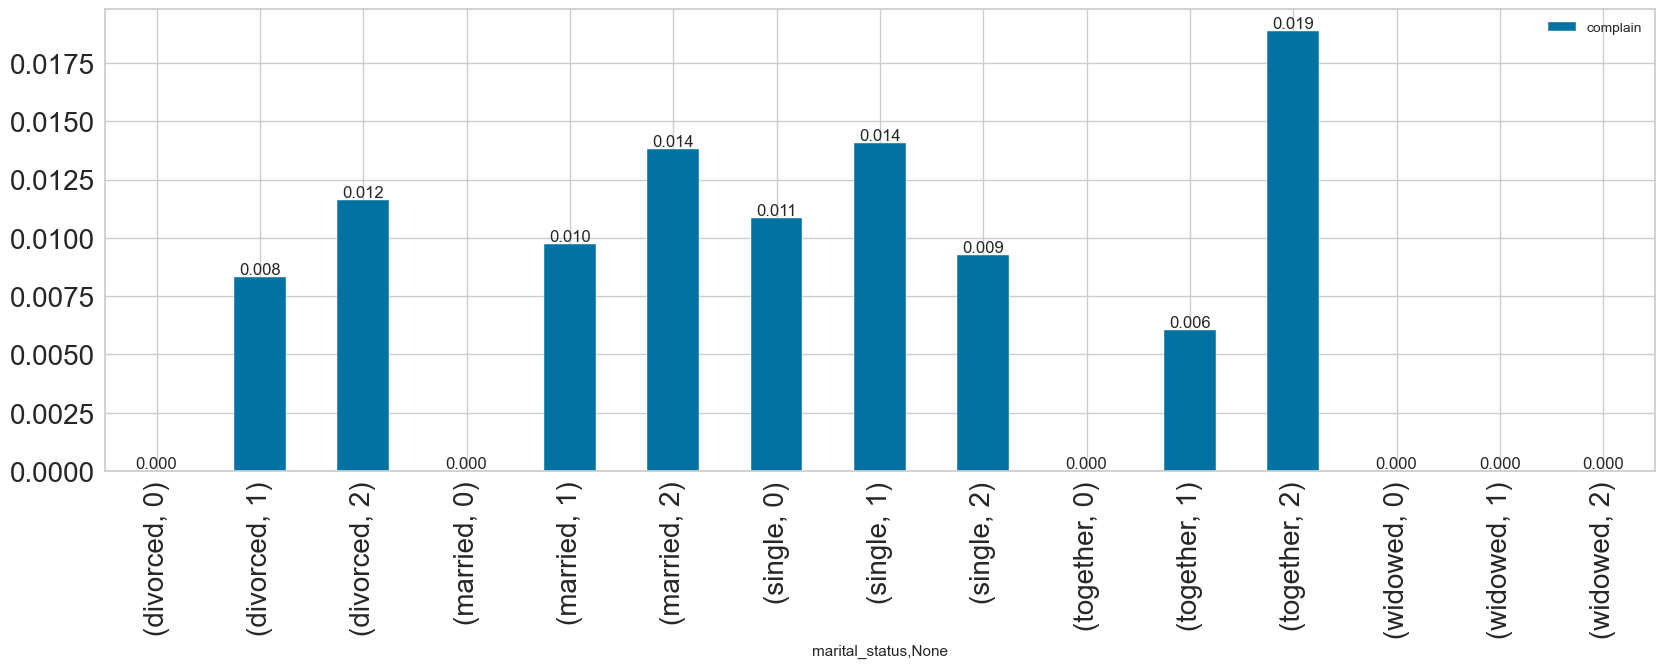

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "complain",
        ]
    ]
    .groupby(["marital_status", final_model.labels_])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.3f", size=12)

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# In order to draw a dendrogram, it's not enough to give the data directly, we have to use linkage.

In [ ]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=df_selected, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(
        link, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10
    )

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

* Let's pay attention to the scales.
* Recommended us 2 clusters, but considering the distances between clusters, it recommends 2 . For that reason ;
* Let's take some insights by looking at silhouette_scores.

### silhouette_score

In [ ]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_selected)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3420043319950989
For n_clusters=3, the silhouette score is 0.2772378307781479
For n_clusters=4, the silhouette score is 0.1765008729548099
For n_clusters=5, the silhouette score is 0.158093534660188
For n_clusters=6, the silhouette score is 0.15658972599476978
For n_clusters=7, the silhouette score is 0.1604392454079655
For n_clusters=8, the silhouette score is 0.15520982205651357
For n_clusters=9, the silhouette score is 0.14848250429908416
For n_clusters=10, the silhouette score is 0.15453826524222855


### Clustering based on selected features

In [ ]:
df_selected

,income,mntwines,mntmeatproducts,numcatalogpurchases,tenure,age
0,0,0.96,2.22,2,0.88,0.72
1,0,-0.34,-0.28,-0.25,-0.70,0.89
2,1,0.53,0.28,0,-0.12,0.28
3,-1,-0.34,-0.22,-0.50,-0.62,-0.78
4,0,-0.00,0.24,0.25,-0.56,-0.61
...,...,...,...,...,...,...
2235,0,1.11,0.53,0.25,0.07,0.17
2236,0,0.48,-0.17,0,-0.97,1.33
2237,0,1.53,0.69,0.25,-0.58,-0.61
2238,1,0.53,0.68,0.75,-0.57,0.78


In [ ]:
Agg1 = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean",  # If linkage = "ward" then metric='euclidean' is required.
    linkage="ward",
)  # originating from the formulation of variance...
y_agg = Agg1.fit_predict(df_selected)

In [ ]:
df1["aglo_labels"] = y_agg

In [ ]:
df1.iloc[:, -2:]

,kmeans_labels,aglo_labels
0,1,2
1,2,0
2,0,1
3,2,0
4,0,1
...,...,...
2235,1,1
2236,0,0
2237,0,1
2238,0,1


In [ ]:
pd.crosstab(df1["kmeans_labels"], df1["aglo_labels"])

aglo_labels,0,1,2
kmeans_labels,,,
0,276,326,31
1,31,247,300
2,1003,26,0


In [ ]:
@interact(col1=df1.columns, col2=df1.columns)
def plot(col1, col2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.scatterplot(
        data=df1, x=col1, y=col2, hue=final_model.labels_, palette="coolwarm", ax=ax[0]
    )
    ax[0].set_title("K-means")
    sns.scatterplot(
        data=df1, x=col1, y=col2, hue=Agg1.labels_, palette="coolwarm", ax=ax[1]
    )
    ax[1].set_title("Aglomerative")
    plt.show()

interactive(children=(Dropdown(description='col1', options=('income', 'kidhome', 'teenhome', 'recency', 'mntwi…

In [ ]:
@interact(col=df.columns, hue=df.select_dtypes(include="O").columns)
def plot(col, hue):
    sns.boxplot(y=col, x=Agg1.labels_, hue=hue, data=df, palette="deep")
    plt.legend(bbox_to_anchor=(1, 1))

interactive(children=(Dropdown(description='col', options=('id', 'education', 'marital_status', 'income', 'kid…

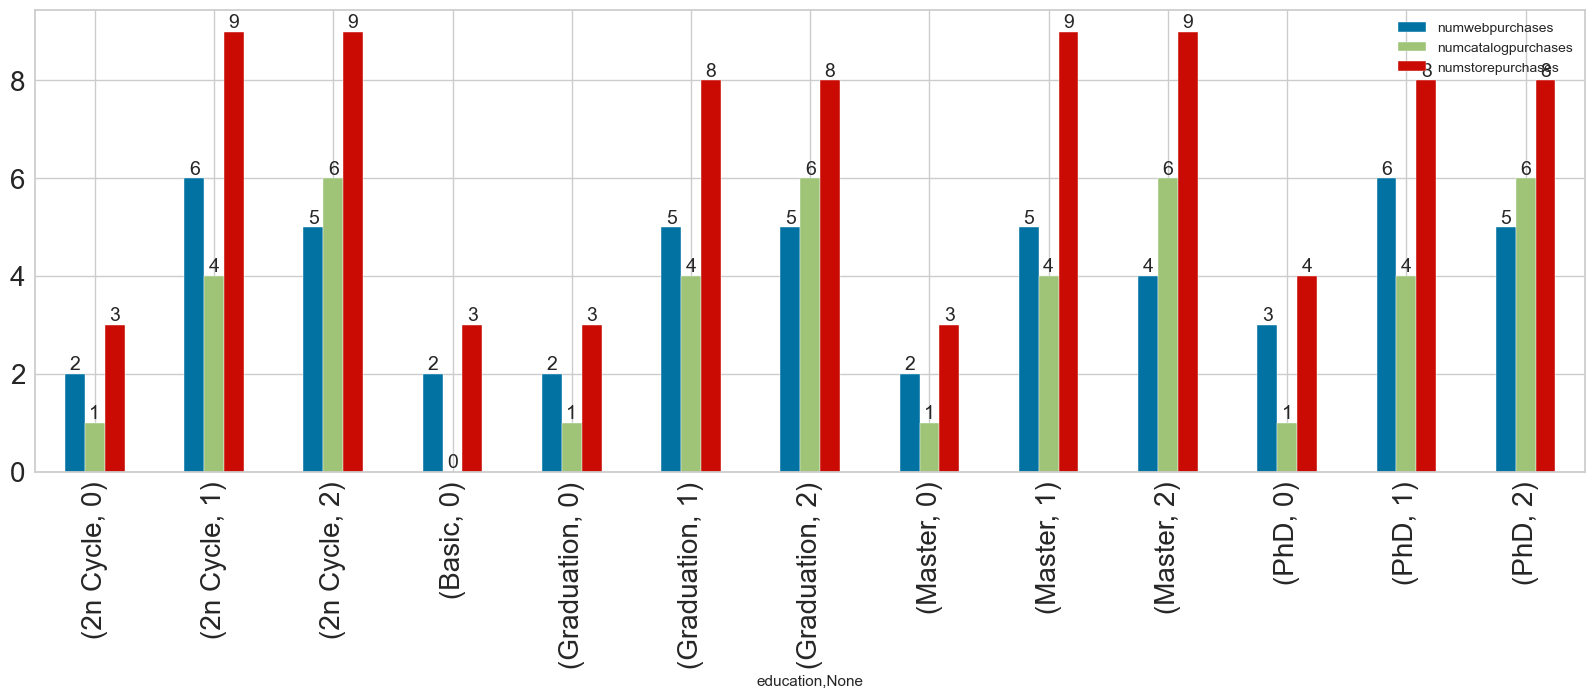

In [ ]:
ax = (
    df[["education"]]
    .join(df1.iloc[:, 11:14])
    .groupby(["education", Agg1.labels_])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

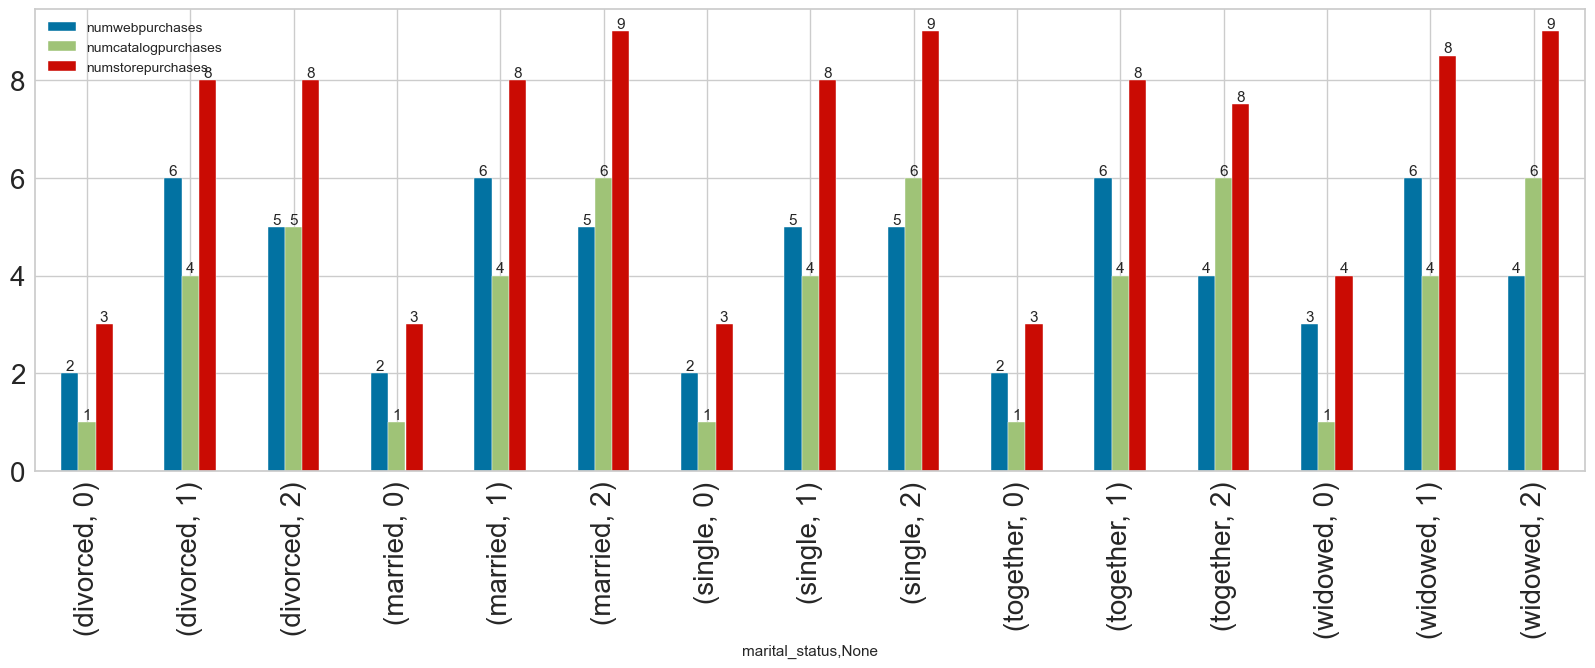

In [ ]:
ax = (
    df[["marital_status"]]
    .join(df1.iloc[:, 11:14])
    .groupby(["marital_status", Agg1.labels_])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=11)

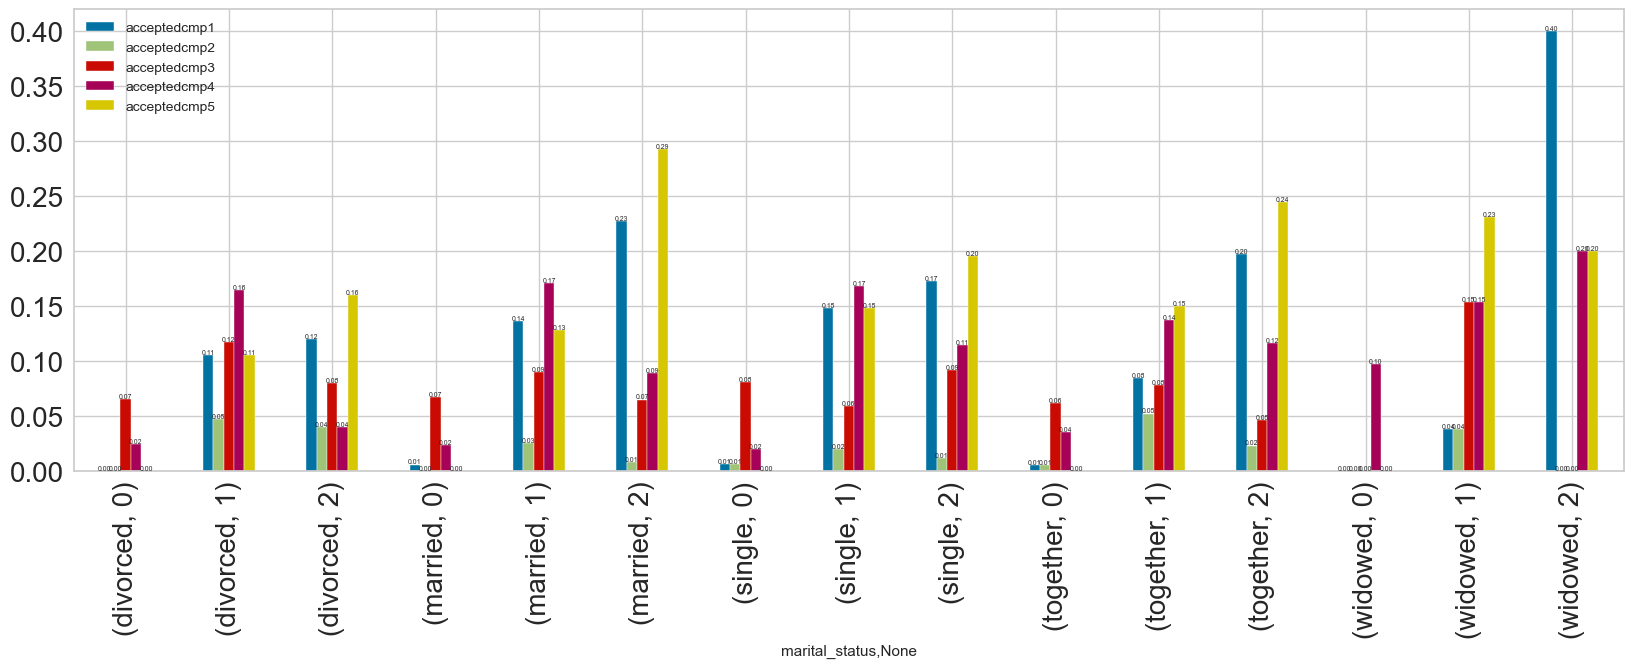

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "acceptedcmp4",
            "acceptedcmp5",
        ]
    ]
    .groupby(["marital_status", Agg1.labels_])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.2f", size=5)

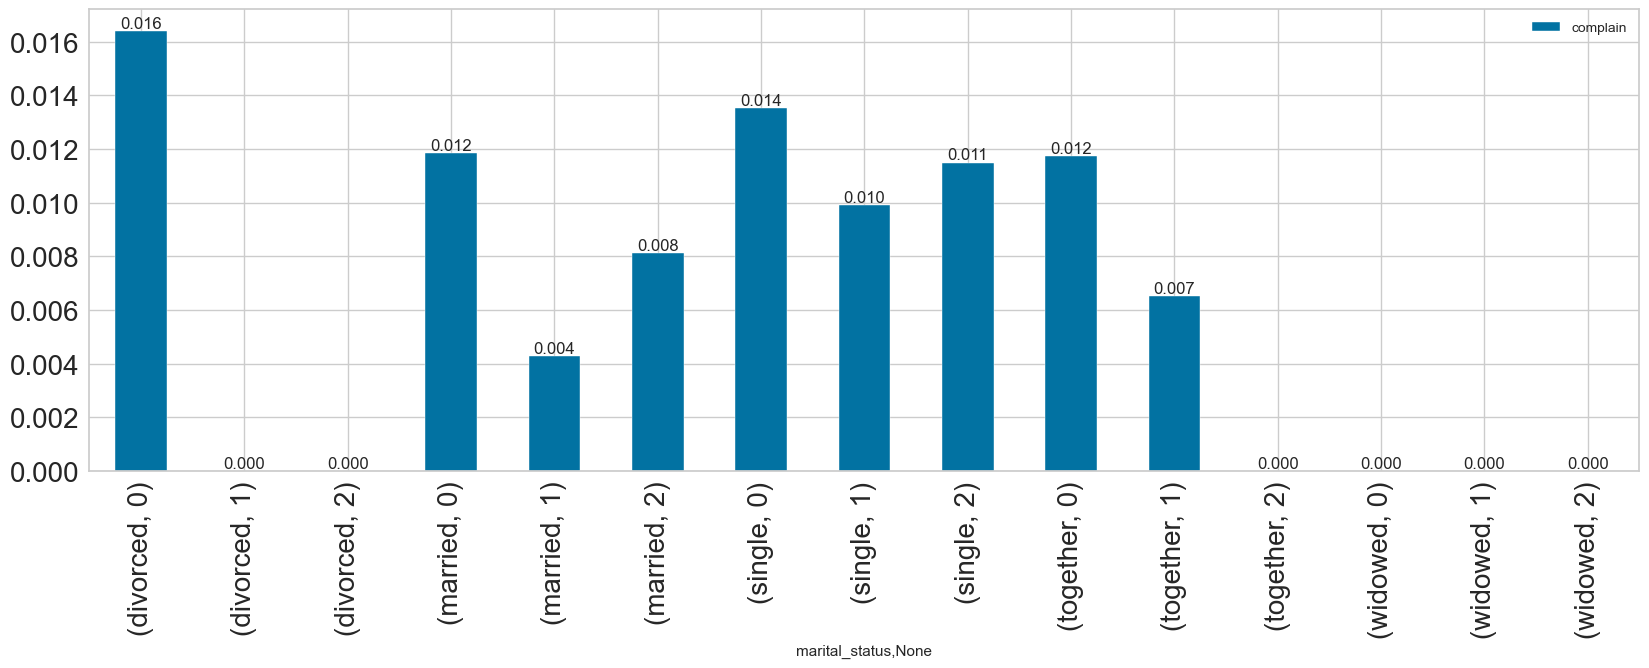

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "complain",
        ]
    ]
    .groupby(["marital_status", Agg1.labels_])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.3f", size=12)

## Conclusion

*These insights are based on median values, which represent the middle value of the data set and are less influenced by outliers. As a result, they provide a more accurate depiction of each group's typical purchasing habits.*

***Overall Patterns:***

1. **Web purchases** are generally higher than catalog purchases across all clusters and education levels. However, store purchases still show the highest numbers, suggesting a preference for store shopping among the customers represented in the data.
2. There is significant variation in purchase behavior across clusters, indicating distinct customer segments.
3. The level of education seems to influence purchase behavior within some clusters, but not consistently across all clusters.
4. Notable variations in purchasing behavior exist among different marital statuses within the same cluster, indicating that marital status significantly impacts purchasing patterns.
5. Acceptance and complain rates vary across the clusters, with each segment exhibiting its own behavior.

***Specific Observations:***

1. **Cluster 2** stands out with the highest median values for all purchase types. This cluster likely represents high-value customers who engage in frequent purchases through various channels, suggesting that these groups are the most active buyers.
2. **Cluster 0** has the lowest median values for all purchase types. This cluster may represent less active customers or those with different shopping preferences.
3. Within clusters, the level of education sometimes influences purchase behavior.
4. Clusters 0 and 2 are associated with more web purchases.
5. The third campaign has a clear effect on cluster 0, the first and fifth on cluster 2, and the fourth on cluster 1.
6. Widowed customers have distinct behavior and are separated within the clusters as well.
7. **Cluster 0** has high complain rate, if activity and purchases increase like **cluster 2** complain rates drops.

***Additional Insights (Potential):***

1. Consider exploring the reasons for cluster 2's high purchase behavior to target marketing or retention strategies.
2. Investigate the factors driving low purchase activity in cluster 0 to potentially re-engage these customers.
3. Further analysis could reveal more nuanced relationships between the level of education and purchase behavior within specific clusters. Understanding the characteristics of each cluster (e.g., demographics, spending habits) could aid in tailoring marketing strategies.

***Labeling for Customer Segments:***

- **Cluster 0**: Low-Activity Customers
- **Cluster 1**: Moderate-Activity Customers
- **Cluster 2**: High-Activity Customers

- https://github.com/nailson/ifood-data-business-analyst-test/blob/master/iFood%20Data%20Analyst%20Case.pdf

- https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___